## Kernel Density Estimator

Using the density of properties as a feature

https://www.kaggle.com/arjanso/kernel-density-estimation-for-predicting-logerror

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
os.chdir(module_path)

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
from matplotlib import pyplot as plt
from sklearn.neighbors import KDTree
from scipy.stats.stats import pearsonr
from scipy.stats import rankdata
%matplotlib inline

In [4]:
train = pd.read_csv('data/train_2016_v2.csv')
props = pd.read_csv('data/properties_2016.csv',low_memory=False)
train = train.merge(props,how='left',on='parcelid')
train = train[['parcelid','longitude','latitude','logerror']]
train.dropna(inplace=True)  #
del props  # delete redundant data
gc.collect()  # Free up memory
print("DataFrame sample:")
print("***************************************************")
print("***************************************************")
print("shape = ",train.shape)

DataFrame sample:
***************************************************
***************************************************
shape =  (90275, 4)


In [6]:
train_2017 = pd.read_csv('data/train_2017.csv')
train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [23]:
props = pd.read_csv('data/properties_2016.csv',low_memory=False)
props.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [27]:
props = props.dropna(subset=['longitude', 'latitude'])

In [7]:
def get_pde(train,bw):
    x = train['longitude'].values
    y = train['latitude'].values
    xy = np.vstack([x,y])
    X = np.transpose(xy)
    tree = KDTree(X,leaf_size = 20 )     
    parcelDensity = tree.kernel_density(X, h=bw,kernel='gaussian',rtol=0.00001)
    return parcelDensity

In [28]:
def get_pde_test(train, test, bw):
    x = train['longitude'].values
    y = train['latitude'].values
    xy = np.vstack([x,y])
    X = np.transpose(xy)
    
    xt = test['longitude'].values
    yt = test['latitude'].values
    xyt = np.vstack([xt,yt])

    Y = np.transpose(xyt)
    
    tree = KDTree(X,leaf_size = 20 )     
    parcelDensity = tree.kernel_density(Y, h=bw,kernel='gaussian',rtol=0.00001)
    return parcelDensity

In [29]:
parcelDensity10000 = get_pde(train,10000)
parcelDensity3000 = get_pde(train,3000)
parcelDensity1000 = get_pde(train,1000)
parcelDensity300 = get_pde(train,300)

KeyboardInterrupt: 

In [30]:
parcelDensityTest3000 = get_pde_test(train, props, 3000)
rankScaledTest3000 = 100*rankdata(parcelDensityTest3000)/len(parcelDensityTest3000)

In [13]:
rankScaled10000 = 100*rankdata(parcelDensity10000)/len(parcelDensity10000)
rankScaled3000 = 100*rankdata(parcelDensity3000)/len(parcelDensity3000)
rankScaled1000 = 100*rankdata(parcelDensity1000)/len(parcelDensity1000)
rankScaled300 = 100*rankdata(parcelDensity300)/len(parcelDensity300)

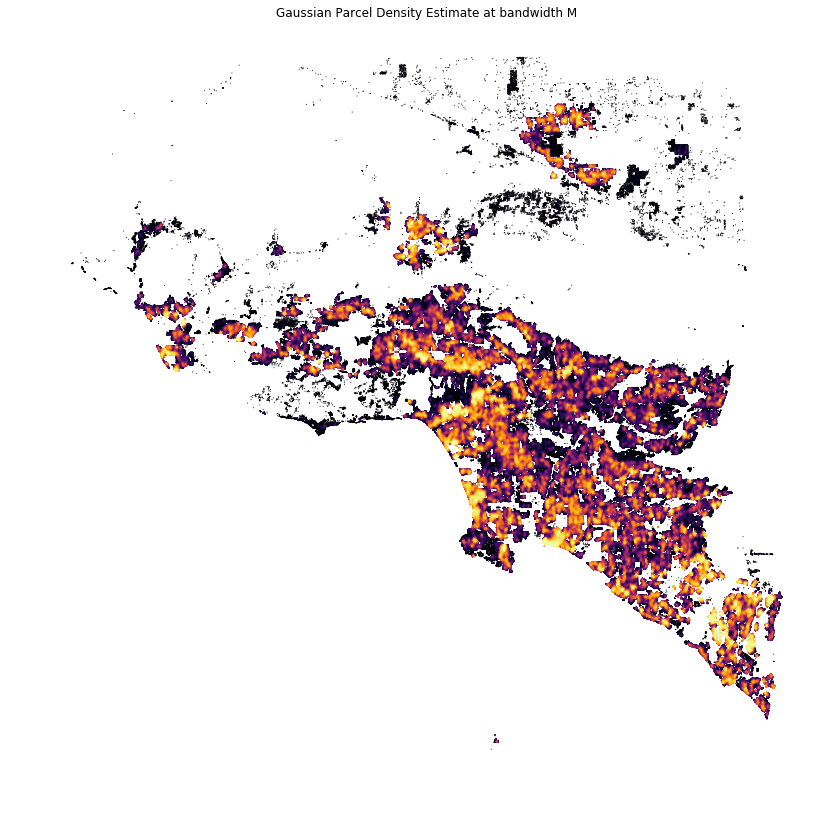

In [34]:
plt.figure(figsize=(14,14))
plt.axis("off")
plt.title("Gaussian Parcel Density Estimate at bandwidth M")
plt.scatter(props['longitude'].values, props['latitude'].values, c=rankScaledTest3000,cmap='inferno', s=1, edgecolor='')

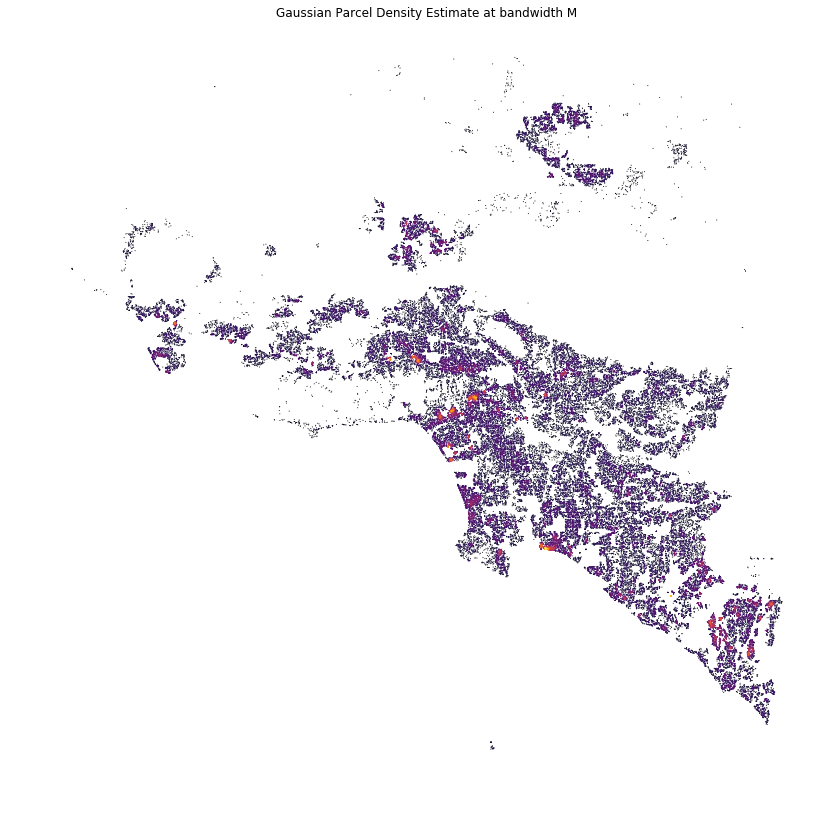

In [38]:
plt.figure(figsize=(14,14))
plt.axis("off")
plt.title("Gaussian Parcel Density Estimate at bandwidth M")
plt.scatter(train['longitude'].values, train['latitude'].values, c=parcelDensity3000,cmap='inferno', s=1, edgecolor='')